In [43]:
import censusdis.data as ced
import censusdis.maps as cem
from censusdis.states import IL
from censusdis.counties.illinois import COOK

import divintseg as dis

## Setup

In [44]:
CENSUS_API_KEY = None
YEAR = 2020
DATASET = "dec/pl"
GROUP = "P1"

# Census tracts consist of a 4 digit identifier within county, and then an optional 2 digit suffix
tracts_near_north = [
    '080100',
    '080201',
    '080202',
    '080300',
    '080400',
    '842200',
    '081000',
    '081100',
    '081201',
    '081202',
    '081300',
    '081401',
    '081402',
    '081403',
    '081500',
    '081600',
    '081700',
    '081800',
    '081900',
    '838300',
]
print(tracts_near_north)

['080100', '080201', '080202', '080300', '080400', '842200', '081000', '081100', '081201', '081202', '081300', '081401', '081402', '081403', '081500', '081600', '081700', '081800', '081900', '838300']


## Download the data for Near North

In [45]:
df_near_north = ced.download(
    dataset=DATASET,
    vintage=YEAR,
    leaves_of_group=GROUP,
    state=IL,
    county=COOK,
    tract=tracts_near_north,
    block='*',
    api_key=CENSUS_API_KEY,
)

## Compute diversity and integration

In [46]:
df_near_north_di = dis.di(
    df_communities=df_near_north,
    by=['STATE', 'COUNTY', 'TRACT'], 
    over='BLOCK'
).reset_index()

df_near_north_di.head(10)

c:\Users\bcong\Dropbox\github\near-north-demographics\.venv\Lib\site-packages\divintseg\_core.py:169: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_communities.groupby(by=by).apply(integration_of_group),


,STATE,COUNTY,TRACT,diversity,integration
0,17,031,080100,0.273690,0.269444
1,17,031,080201,0.258376,0.252870
2,17,031,080202,0.314014,0.306937
3,17,031,080300,0.342512,0.329633
4,17,031,080400,0.581105,0.314613
5,17,031,081000,0.496135,0.462170
6,17,031,081100,0.438617,0.406125
7,17,031,081201,0.358552,0.346222
8,17,031,081202,0.260745,0.257130
9,17,031,081300,0.405652,0.399123


## Plot

In [47]:
df_near_north_di = ced.add_inferred_geography(df_near_north_di, YEAR)

In [48]:
df_near_north_di.head(10)

,STATE,COUNTY,TRACT,diversity,integration,geometry
0,17,031,080100,0.273690,0.269444,"POLYGON ((-87.62889 41.91122, -87.62573 41.911..."
1,17,031,080201,0.258376,0.252870,"POLYGON ((-87.63323 41.91116, -87.63308 41.911..."
2,17,031,080202,0.314014,0.306937,"POLYGON ((-87.63312 41.9077, -87.63157 41.9078..."
3,17,031,080300,0.342512,0.329633,"POLYGON ((-87.63859 41.91112, -87.63762 41.911..."
4,17,031,080400,0.581105,0.314613,"POLYGON ((-87.64343 41.91102, -87.64306 41.911..."
5,17,031,081000,0.496135,0.462170,"POLYGON ((-87.63448 41.90385, -87.633 41.90388..."
6,17,031,081100,0.438617,0.406125,"POLYGON ((-87.62999 41.90392, -87.62868 41.903..."
7,17,031,081201,0.358552,0.346222,"POLYGON ((-87.62834 41.90156, -87.6272 41.9015..."
8,17,031,081202,0.260745,0.257130,"POLYGON ((-87.62868 41.90394, -87.62798 41.903..."
9,17,031,081300,0.405652,0.399123,"POLYGON ((-87.6241 41.89839, -87.62413 41.8992..."


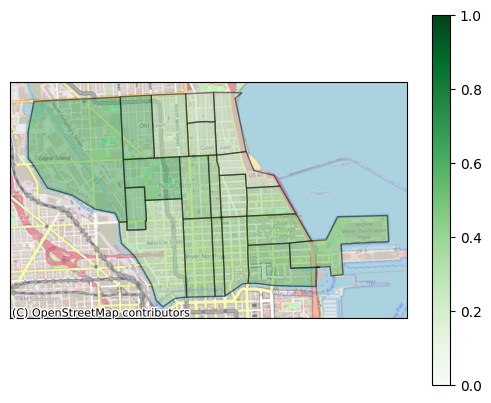

In [49]:
ax = cem.plot_map(
    df_near_north_di,
    "diversity",
    cmap="Greens",
    edgecolor="black",
    alpha=0.5,
    with_background=True,
    legend=True,
    vmin=0.0,
    vmax=1.0,
)